# Softmax Regression - CreditCard

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [1]:
!gdown 1NwikiUU_Yzom-l4Kwy24Cn-bG46gMmG4 -O "data/creditcard.csv"

Downloading...
From (original): https://drive.google.com/uc?id=1NwikiUU_Yzom-l4Kwy24Cn-bG46gMmG4
From (redirected): https://drive.google.com/uc?id=1NwikiUU_Yzom-l4Kwy24Cn-bG46gMmG4&confirm=t&uuid=35d64c26-6ca9-420f-94f2-8d6c9dea5e47
To: /mnt/d/AIO2024/study_project/AIO2024_Exercises/module05/week02_softmax_regression/data/creditcard.csv
100%|████████████████████████████████████████| 151M/151M [00:18<00:00, 7.95MB/s]


## Load Dataset

In [2]:
df = pd.read_csv("data/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## Preprocessing 

In [4]:
dataset_arr = df.to_numpy()
dataset_arr.shape

(284807, 31)

### Prepare Features and Labels with Bias Term

In [5]:
X = dataset_arr[:, :-1].astype(np.float64)
y = dataset_arr[:, -1].astype(np.uint8)

X.shape, y.shape

((284807, 30), (284807,))

In [6]:
intercept = np.ones((X.shape[0], 1))
X_b = np.concatenate((intercept, X), axis=1)
X_b[0]

array([ 1.00000000e+00,  0.00000000e+00, -1.35980713e+00, -7.27811733e-02,
        2.53634674e+00,  1.37815522e+00, -3.38320770e-01,  4.62387778e-01,
        2.39598554e-01,  9.86979013e-02,  3.63786970e-01,  9.07941720e-02,
       -5.51599533e-01, -6.17800856e-01, -9.91389847e-01, -3.11169354e-01,
        1.46817697e+00, -4.70400525e-01,  2.07971242e-01,  2.57905802e-02,
        4.03992960e-01,  2.51412098e-01, -1.83067779e-02,  2.77837576e-01,
       -1.10473910e-01,  6.69280749e-02,  1.28539358e-01, -1.89114844e-01,
        1.33558377e-01, -2.10530535e-02,  1.49620000e+02])

### One-Hot Encode Labels

In [7]:
n_classes = np.unique(y, axis=0).shape[0]
n_samples = y.shape[0]

y_encoded = np.array([np.zeros(n_classes) for _ in range(n_samples)])
y_encoded[np.arange(n_samples), y] = 1
y_encoded[:5]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

### Train Test Val split 

In [8]:
X_train, X_val, y_train, y_val = train_test_split(
    X_b, y_encoded,
    test_size=0.2,
    random_state=2,
    shuffle=True
)

X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train,
    test_size=0.125,
    random_state=2,
    shuffle=True
)

print("Train: ",X_train.shape, y_train.shape)
print("Val: ",X_val.shape, y_val.shape)
print("Test: ",X_test.shape, y_test.shape)

Train:  (199364, 31) (199364, 2)
Val:  (56962, 31) (56962, 2)
Test:  (28481, 31) (28481, 2)


### Normalize Features Using StandardScaler

In [9]:
normalizer = StandardScaler()

X_train[:, 1:] = normalizer.fit_transform(X_train[:, 1:])
X_val[:, 1:] = normalizer.fit_transform(X_val[:, 1:])
X_test[:, 1:] = normalizer.fit_transform(X_test[:, 1:])

## Train & Evaluation

In [ ]:
def softmax(z):
    exp_z = np.exp(z)
    return exp_z / exp_z.sum(axis=1)[:, None]

def predict(X, theta):
    z = np.dot(X, theta)
    y_pred = softmax(z)
    return y_pred

def compute_loss(y_pred, y):
    n = y.size
    return (-1 / n) * np.sum(y * np.log(y_pred))

def compute_gradient(X, y, y_pred):
    n = y.size
    return np.dot(X.T, (y_pred - y)) / n

def update_theta(theta, gradient, lr):
    return theta - lr * gradient

def compute_accuracy(X, y, theta):
    y_pred = predict(X, theta)
    acc = (np.argmax(y_pred, axis=1) == np.argmax(y, axis=1)).mean()
    return acc


In [ ]:
lr = 0.01 
epochs = 30
batch_size = 1024
n_features = X_train.shape[1]

np.random.seed(2)
theta = np.random.uniform(size=(n_features, n_classes))

In [16]:
train_accs, train_losses = [], []
val_accs, val_losses = [], []

for epoch in range(epochs):
    train_batch_losses, train_batch_accs = [], []
    val_batch_losses, val_batch_accs = [], []
    for i in range(0, X_train.shape[0], batch_size):
        X_i = X_train[i:i+batch_size]
        y_i = y_train[i:i+batch_size]
        
        # Train
        y_pred = predict(X_i, theta)
        
        train_loss = compute_loss(y_pred, y_i)
        
        train_batch_losses.append(train_loss)
        
        gradient = compute_gradient(X_i, y_i, y_pred)
        
        theta = update_theta(theta, gradient, lr)
        
        train_acc = compute_accuracy(X_train, y_train, theta)
        train_batch_accs.append(train_acc)
        
        # Val
        y_val_pred = predict(X_val, theta)
        
        val_loss = compute_loss(y_val_pred, y_val)
        val_batch_losses.append(val_loss)
        
        val_acc = compute_accuracy(X_val, y_val, theta)
        val_batch_accs.append(val_acc)
        
    train_batch_loss = np.mean(train_batch_losses)
    val_batch_loss = np.mean(val_batch_losses)
    train_batch_acc = np.mean(train_batch_accs)
    val_batch_acc = np.mean(val_batch_accs)
    
    train_losses.append(train_batch_loss)
    val_losses.append(val_batch_loss)
    train_accs.append(train_batch_acc)
    val_accs.append(val_batch_acc)
    
    print(f"\nEpoch {epoch + 1} \tTraing loss: {train_batch_loss:.3f}\tValidation loss:{val_batch_loss:.3f}")
        


Epoch 1 	Traing loss: 0.115	Validation loss:0.115

Epoch 2 	Traing loss: 0.081	Validation loss:0.082

Epoch 3 	Traing loss: 0.062	Validation loss:0.062

Epoch 4 	Traing loss: 0.049	Validation loss:0.049

Epoch 5 	Traing loss: 0.041	Validation loss:0.041

Epoch 6 	Traing loss: 0.035	Validation loss:0.035

Epoch 7 	Traing loss: 0.031	Validation loss:0.031

Epoch 8 	Traing loss: 0.028	Validation loss:0.027

Epoch 9 	Traing loss: 0.025	Validation loss:0.025

Epoch 10 	Traing loss: 0.023	Validation loss:0.023

Epoch 11 	Traing loss: 0.021	Validation loss:0.021

Epoch 12 	Traing loss: 0.020	Validation loss:0.020

Epoch 13 	Traing loss: 0.019	Validation loss:0.018

Epoch 14 	Traing loss: 0.017	Validation loss:0.017

Epoch 15 	Traing loss: 0.017	Validation loss:0.016

Epoch 16 	Traing loss: 0.016	Validation loss:0.015

Epoch 17 	Traing loss: 0.015	Validation loss:0.015

Epoch 18 	Traing loss: 0.014	Validation loss:0.014

Epoch 19 	Traing loss: 0.014	Validation loss:0.013

Epoch 20 	Traing los

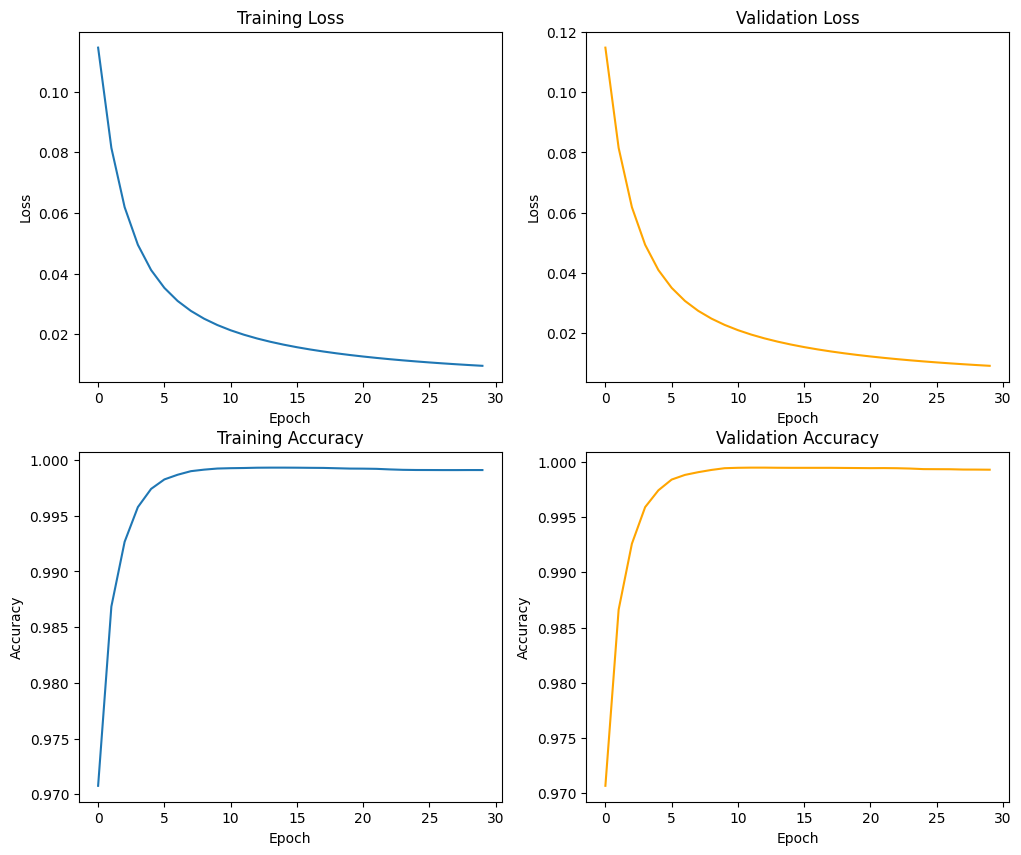

In [18]:
fix, ax = plt.subplots(2, 2, figsize=(12, 10))
ax[0, 0].plot(train_losses)
ax[0, 0].set(xlabel="Epoch", ylabel="Loss")
ax[0, 0].set_title("Training Loss")

ax[0, 1].plot(val_losses, "orange")
ax[0, 1].set(xlabel="Epoch", ylabel="Loss")
ax[0, 1].set_title("Validation Loss")

ax[1, 0].plot(train_accs)
ax[1, 0].set(xlabel="Epoch", ylabel="Accuracy")
ax[1, 0].set_title("Training Accuracy")

ax[1, 1].plot(val_accs, "orange")
ax[1, 1].set(xlabel="Epoch", ylabel="Accuracy")
ax[1, 1].set_title("Validation Accuracy")

plt.show()

In [19]:
val_set_acc = compute_accuracy(X_val, y_val, theta)
test_set_acc = compute_accuracy(X_test, y_test, theta)

print("Evaluation on validation and test set:")
print("Accuracy: ", val_set_acc)
print("Accuracy: ", test_set_acc)

Evaluation on validation and test set:
Accuracy:  0.9993153330290369
Accuracy:  0.9992275552122467
